In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
sklearn.__version__

'0.22.2.post1'

In [2]:
zscores = pd.read_hdf('corpusDE.h5')
zscores

,Total_per_text,sagte,schon,ja,mehr,immer,s,ganz,sah,wurde,...,maß,wonne,kranke,fragt,orte,befinden,johanna,starb,erfüllen,ferner
"corpus_DE/Schopenhauer,-Johanna_Richard Wood.txt",56331.0,12.0,157.0,87.0,157.0,236.0,43.0,241.0,96.0,199.0,...,1.0,4.0,2.0,1.0,10.0,4.0,1.0,0.0,10.0,5.0
"corpus_DE/Kafka,-Franz_Amerika.txt",39854.0,678.0,372.0,294.0,145.0,170.0,4.0,174.0,176.0,92.0,...,1.0,1.0,0.0,2.0,1.0,3.0,1.0,0.0,2.0,1.0
"corpus_DE/Francois,-Louise-von_Stufenjahre eines Gluecklichen.txt",81148.0,214.0,219.0,386.0,268.0,102.0,6.0,91.0,118.0,183.0,...,5.0,2.0,7.0,7.0,6.0,5.0,0.0,3.0,6.0,2.0
"corpus_DE/Fischer,-Caroline-Auguste_Gustavs Verirrungen.txt",8994.0,65.0,34.0,45.0,61.0,23.0,6.0,15.0,34.0,13.0,...,0.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,1.0,0.0
"corpus_DE/Wassermann,-Jakob_Das Gaensemaennchen.txt",78899.0,487.0,184.0,237.0,311.0,206.0,266.0,126.0,212.0,335.0,...,17.0,2.0,1.0,3.0,1.0,2.0,0.0,5.0,1.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"corpus_DE/Raabe,-Wilhelm_Im alten Eisen.txt",25633.0,90.0,118.0,125.0,103.0,61.0,62.0,105.0,34.0,27.0,...,0.0,1.0,2.0,1.0,9.0,2.0,0.0,0.0,0.0,2.0
"corpus_DE/Lewald,-Fanny_Jenny.txt",44871.0,273.0,84.0,67.0,143.0,124.0,478.0,93.0,104.0,92.0,...,0.0,12.0,6.0,2.0,3.0,5.0,0.0,1.0,12.0,2.0
"corpus_DE/Raabe,-Wilhelm_Stopfkuchen Eine See- und Mordgeschichte.txt",29311.0,118.0,98.0,251.0,127.0,112.0,88.0,150.0,41.0,24.0,...,1.0,2.0,0.0,5.0,1.0,1.0,0.0,0.0,0.0,2.0
"corpus_DE/Schopenhauer,-Johanna_Die Tante.txt",60495.0,19.0,195.0,136.0,184.0,282.0,15.0,255.0,136.0,70.0,...,1.0,7.0,4.0,2.0,11.0,9.0,1.0,5.0,15.0,6.0


In [3]:
def evaluation():
    predictions = model.predict(X_test)

    recall = np.around(recall_score(y_test, predictions, average='micro'), decimals=3)
    precision = np.around(precision_score(y_test, predictions, average='micro'), decimals=3)
    f1 = np.around(f1_score(y_test, predictions, average="micro"), decimals=3)

    return recall, precision, f1

In [4]:
def save_predicted_data_into_structured_df(df, model):
    recall, precision, f1 = evaluation()
    return df.append({'model':model, 'recall':recall, 'precision':precision, 'f1':f1}, ignore_index=True)

bal_scores = pd.DataFrame(columns=['model', 'recall', 'precision', 'f1'])

In [5]:
def absolute_cnf_matrix(cls):
    predictions = model.predict(X_test)
    cnf = confusion_matrix(y_test, predictions)
    ax= plt.subplot()
    plt.figure(figsize=(5,5))  
    sns.heatmap(cnf, annot=True, cmap=sns.color_palette("Blues"), ax = ax, fmt='d'); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(cls)
    ax.yaxis.set_ticklabels(cls)

In [6]:
def normalized_cnf_matrix(cls):
    predictions = model.predict(X_test)
    cnf = confusion_matrix(y_test, predictions, normalize='all')
    ax= plt.subplot()
    plt.figure(figsize=(5,5))  
    sns.heatmap(cnf, annot=True, cmap=sns.color_palette("Blues"), ax = ax); #annot=True to annotate cells

    
    tn, fp, fn, tp = cnf.ravel()
    
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(cls)
    ax.yaxis.set_ticklabels(cls)
    return tn,fp, fn,tp

In [8]:
cls = ['same', 'different']
normalized_cnf_matrix(cls)

NameError: name 'model' is not defined

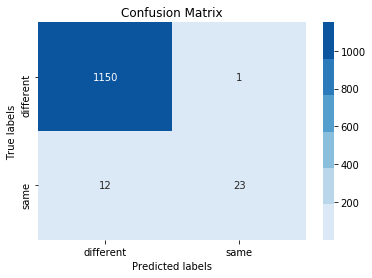

<Figure size 360x360 with 0 Axes>

In [35]:
absolute_cnf_matrix(cls)

In [49]:
data = pd.DataFrame(pd.read_csv('10_delta_piperDE.h5'))
data = data[data.cosine != 0.00]
data

,Unnamed: 0,manhattan,cosine,euclidean,label,author
1,"Hoffmann,E.T.A_LebensAnsichtenDesKatersMurr_No...",3.23,0.09,1.28,different,Hoffmann
2,"Spielhagen,Friedrich_ProblematischeNaturen2_No...",3.92,0.12,1.54,different,Spielhagen
3,"Hoffmann,E.T.A_DieElixiereDesTeufels_Novel.txt",4.15,0.15,1.65,different,Hoffmann
4,"Spielhagen,Friedrich_ProblematischeNaturen1_No...",5.52,0.23,2.18,different,Spielhagen
5,"Unger,FriederikeHelene_BekenntnisseeinerschoÌ...",5.69,0.25,2.29,different,Unger
...,...,...,...,...,...,...
22796,"Huber,Therese_Luise_Novel.txt",24.49,1.32,9.40,different,Huber
22797,"Fischer,CarolineAuguste_DieHonigmonathe_Novel.txt",26.69,1.70,9.98,different,Fischer
22798,"Fischer,CarolineAuguste_Margarethe_Novel.txt",26.92,1.68,10.12,different,Fischer
22799,"Ehrmann,Marianne_NinasBriefeanihrenGeliebten_N...",27.00,1.62,10.27,different,Ehrmann


In [59]:
data2 = pd.DataFrame(pd.read_csv('9000_delta_piperDE.h5'))
data2 = data2[data2.cosine != 0.00]
data2

,Unnamed: 0,manhattan,cosine,euclidean,label,author
1,"Arnim,Achimvon_ArmutReichtumSchuldUndBusseDerG...",7281.00,0.78,123.54,same,Arnim
2,"Brentano,Clemens_Godwi_Novel.txt",7511.31,0.86,132.12,different,Brentano
3,"Tieck,Ludwig_WilliamLovell_Novel.txt",7790.69,0.90,135.97,different,Tieck
4,"Paul,Jean_Hesperus_Novel.txt",7900.25,0.95,137.70,different,Paul
5,"Arnim,Achimvon_DieKronenwachterErsterBandBerth...",7936.52,0.91,138.83,same,Arnim
...,...,...,...,...,...,...
22796,"Arnim,Achimvon_HollinsLiebeleben_Novel.txt",9121.27,1.04,159.17,different,Arnim
22797,"Fischer,CarolineAuguste_GustavsVerirrungen_Nov...",9155.55,1.07,164.77,different,Fischer
22798,"Ehrmann,Marianne_NinasBriefeanihrenGeliebten_N...",9237.86,1.12,167.63,different,Ehrmann
22799,"Fischer,Caroline Auguste_VierzehnTageinParis_N...",9419.90,1.04,173.78,different,Fischer


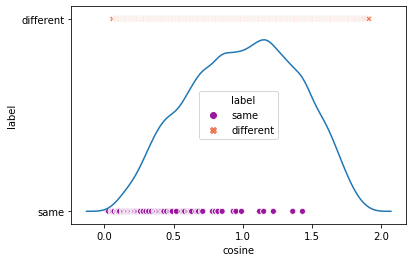

In [58]:
#normal distribution of cosine values for above entire corpus
sns.distplot(data['cosine'], hist=False)
#sns.catplot(x='cosine', y='label', data=data)
sns.scatterplot(x='cosine', y='label', hue='label', palette='plasma', style='label', data=data)
#ax.set(ylabel='Count')

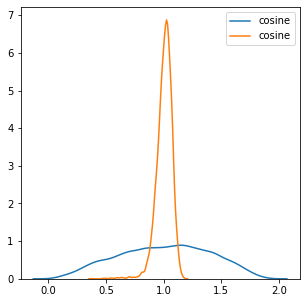

In [90]:
# verschiedene Korpora bei gleichem MFW-Wert vergleichen
fig, ax = plt.subplots(figsize=(5,5))

ax = sns.kdeplot(data['cosine'])
ax = sns.kdeplot(data2['cosine'])

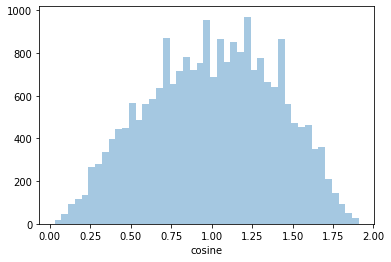

In [55]:
sns.distplot(data['cosine'], kde=False)

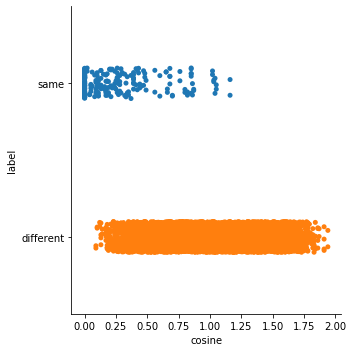

In [12]:
ax = sns.catplot(x='cosine', y='label', data=data)

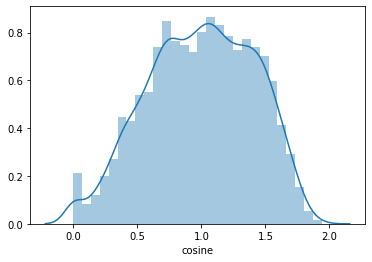

In [16]:
#normal distribution of euclidean values for above entire corpus
ax = sns.distplot(data['cosine'])
#ax = sns.scatterplot(x=data['euclidean'], y=data['label'], hue=data['label'], palette='magma', style=data['label'], data=data)
#ax.set(ylabel='Count')

[Text(0, 0.5, 'Count')]

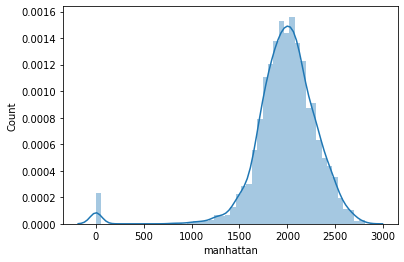

In [13]:
#normal distribution of manhattan values for above entire corpus
ax = sns.distplot(data['manhattan'])
#ax = sns.scatterplot(x=data['manhattan'], y=data['label'], hue=data['label'], palette='Reds', style=data['label'], data=data)
ax.set(ylabel='Count')

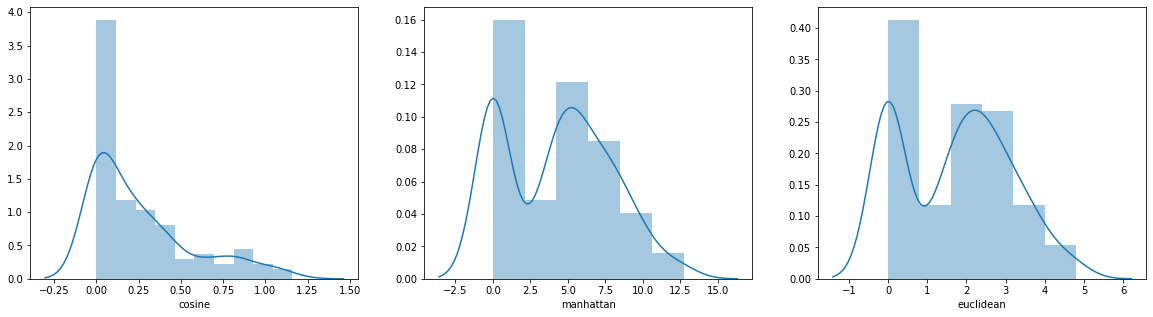

In [17]:
same = pd.DataFrame(data.loc[data['label'] == 'same'])
f, axes = plt.subplots(1, 3, figsize=(20,5))

sns.distplot(same['cosine'], ax=axes[0])
sns.distplot(same['manhattan'], ax=axes[1])
sns.distplot(same['euclidean'],ax=axes[2])

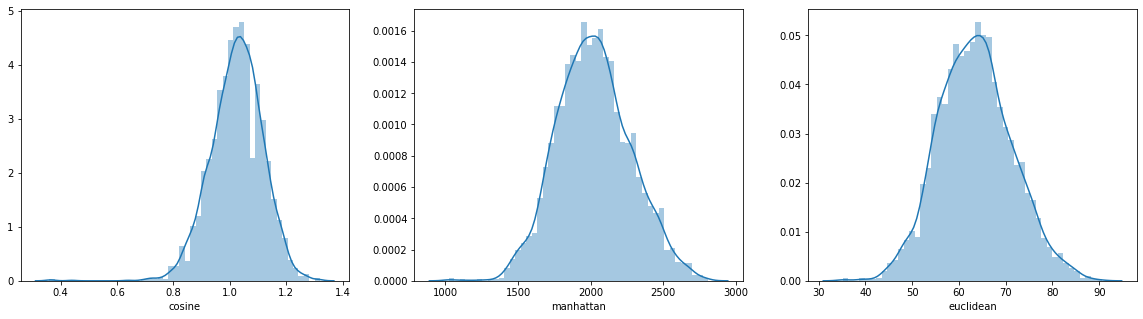

In [15]:
different = pd.DataFrame(data.loc[data['label'] == 'different'])
f, axes = plt.subplots(1, 3, figsize=(20,5))

sns.distplot(different['cosine'], ax=axes[0])
sns.distplot(different['manhattan'], ax=axes[1])
sns.distplot(different['euclidean'],ax=axes[2])

In [16]:
X = data['cosine'].values.reshape(-1,1)
y = data['label']

In [17]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.        ],
       [0.37121212],
       [0.40151515],
       ...,
       [0.90151515],
       [0.96212121],
       [0.96969697]])

In [18]:
y = LabelEncoder().fit_transform(data['label'])

In [19]:
print(X.shape)
y.shape

(5929, 1)


(5929,)

In [20]:
logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = logreg.fit(X_train, y_train)

In [21]:
bal_scores = save_predicted_data_into_structured_df(bal_scores, 'Logistic Regression')
bal_scores

,model,recall,precision,f1
0,Logistic Regression,0.989,0.989,0.989


In [22]:
cls = np.unique(data['label'])

In [99]:
#so eine cnf aus den errors erstellen
cnf = [[0,1],[2,10]]
cls = ['same', 'different']

In [97]:
def visualize_cnf_matrix(cnf, cls):
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cnf, annot=True, cmap=sns.color_palette("Blues"), ax = ax)

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(cls)
    ax.yaxis.set_ticklabels(cls)

    #plt.savefig(str(mfw) + '_' + str(percentage) + '_' + str(corpus) + '.png')
    #plt.close(fig)
    plt.show()

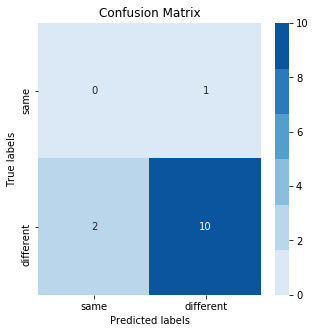

In [98]:
visualize_cnf_matrix(cnf,cls)

In [3]:
piper = pd.read_csv('2_txtlab_Novel450.csv')
piper

,filename,id,language,date,author,title,gender,person,length
0,"DE_1771_La Roche,Sophievon_GeschichtedesFräul...",1,German,1771,"La Roche,Sophievon",GeschichtedesFräuleinsvonSternheim,female,first,99070
1,"DE_1774_Goethe,Johann_DieLeidendesjungenWerthe...",2,German,1774,"Goethe,Johann",DieLeidendesjungenWerthers1,male,first,34976
2,"DE_1774_Wieland,ChristophMartin_GeschichtederA...",3,German,1774,"Wieland,ChristophMartin",GeschichtederAbderiten,male,first,107398
3,"DE_1776_Nicolai,Friedrich_SebaldusNothanker_No...",4,German,1776,"Nicolai,Friedrich",SebaldusNothanker,male,third,122673
4,"DE_1779_Campe,Joachim_Robinson_Novel.txt",5,German,1779,"Campe,Joachim",Robinson,male,third,99439
...,...,...,...,...,...,...,...,...,...
445,"FR_1926_Giraudoux,Jean_Bella_Novel.txt",446,French,1926,"Giraudoux,Jean",Bella,male,first,47928
446,"FR_1926_Ramuz,CharlesFerdinand_GrandePeurDansl...",447,French,1926,"Ramuz,CharlesFerdinand",GrandePeurDanslaMontagne,male,first,49205
447,"FR_1927_Bernanos,Georges_Limposture_Novel.txt",448,French,1927,"Bernanos,Georges",Limposture,male,third,79206
448,"FR_1927_Duhamel,Georges_JournaldeSalavin_Novel...",449,French,1927,"Duhamel,Georges",JournaldeSalavin,male,first,41694


In [4]:
german = piper[piper['language']=='German']
german

,filename,id,language,date,author,title,gender,person,length
0,"DE_1771_La Roche,Sophievon_GeschichtedesFräul...",1,German,1771,"La Roche,Sophievon",GeschichtedesFräuleinsvonSternheim,female,first,99070
1,"DE_1774_Goethe,Johann_DieLeidendesjungenWerthe...",2,German,1774,"Goethe,Johann",DieLeidendesjungenWerthers1,male,first,34976
2,"DE_1774_Wieland,ChristophMartin_GeschichtederA...",3,German,1774,"Wieland,ChristophMartin",GeschichtederAbderiten,male,first,107398
3,"DE_1776_Nicolai,Friedrich_SebaldusNothanker_No...",4,German,1776,"Nicolai,Friedrich",SebaldusNothanker,male,third,122673
4,"DE_1779_Campe,Joachim_Robinson_Novel.txt",5,German,1779,"Campe,Joachim",Robinson,male,third,99439
...,...,...,...,...,...,...,...,...,...
145,"DE_1918_Ball,Hugo_Flammetti_Novel.txt",146,German,1918,"Ball,Hugo",Flammetti,male,third,45771
146,"DE_1920_Christ,Lena_MadamBäurin_Novel.txt",147,German,1920,"Christ,Lena",MadamBäurin,female,third,34039
147,"DE_1922_Kafka,Franz_DasSchloß_Novel.txt",148,German,1922,"Kafka,Franz",DasSchloß,male,third,107862
148,"DE_1930_Roth,Joseph_Hiob_Novel.txt",149,German,1930,"Roth,Joseph",Hiob,male,third,50299


In [6]:
authors = np.unique(german['author'])
len(authors)

89

In [8]:
german['length'].mean()

96306.79333333333

In [15]:
french = piper[piper['language']=='French']
french

,filename,id,language,date,author,title,gender,person,length
300,"FR_1771_Dorat,ClaudeJoseph_LesSacrificesDeLAmo...",301,French,1771,"Dorat,ClaudeJoseph",LesSacrificesDeLAmour,male,first,68295
301,"FR_1772_Arnaud,FrancoisThomasMariedeBaculardd'...",302,French,1772,"Arnaud,FrancoisThomasMariedeBaculardd'",EpreuvesDuSentiment,male,third,199419
302,"FR_1774_Mercier,LouisSebastian_LanDeuxMilleQua...",303,French,1774,"Mercier,LouisSebastian",LanDeuxMilleQuatreCentQuarante,male,first,63900
303,"FR_1775_Gerard,PhilippeLouis_LeComteDeValmont_...",304,French,1775,"Gerard,PhilippeLouis",LeComteDeValmont,male,first,165746
304,"FR_1776_Riccoboni,MarieJeannedeHeurlesLaborasd...",305,French,1776,"Riccoboni,MarieJeannedeHeurlesLaborasdeMezieres",LettresDeMylordRiversASirCharlesCardigan,female,first,44954
...,...,...,...,...,...,...,...,...,...
445,"FR_1926_Giraudoux,Jean_Bella_Novel.txt",446,French,1926,"Giraudoux,Jean",Bella,male,first,47928
446,"FR_1926_Ramuz,CharlesFerdinand_GrandePeurDansl...",447,French,1926,"Ramuz,CharlesFerdinand",GrandePeurDanslaMontagne,male,first,49205
447,"FR_1927_Bernanos,Georges_Limposture_Novel.txt",448,French,1927,"Bernanos,Georges",Limposture,male,third,79206
448,"FR_1927_Duhamel,Georges_JournaldeSalavin_Novel...",449,French,1927,"Duhamel,Georges",JournaldeSalavin,male,first,41694


In [18]:
fauthor = np.unique(french.author)
len(fauthor)

101

In [19]:
french.length.mean()

86680.54666666666

In [20]:
english = piper[piper['language']=='English']
english

,filename,id,language,date,author,title,gender,person,length
150,"EN_1771_Mackenzie,Henry_TheManofFeeling_Novel.txt",151,English,1771,"Mackenzie,Henry",TheManofFeeling,male,first,36458
151,"EN_1771_Smollett,Tobias_TheExpedictionofHenryC...",152,English,1771,"Smollett,Tobias",TheExpedictionofHenryClinker,male,first,148261
152,"EN_1778_Burney,Fanny_Evelina_Novel.txt",153,English,1778,"Burney,Fanny",Evelina,female,first,154168
153,"EN_1782_Burney,Fanny_Cecilia_Novel.txt",154,English,1782,"Burney,Fanny",Cecilia,female,third,328981
154,"EN_1786_Beckford,William_Vathek_Novel.txt",155,English,1786,"Beckford,William",Vathek,male,third,36077
...,...,...,...,...,...,...,...,...,...
295,"EN_1922_Joyce,James_Ulysses_Novel.txt",296,English,1922,"Joyce,James",Ulysses,male,first,264170
296,"EN_1925_Woolf,Virginia_Mrs.Dalloway_Novel.txt",297,English,1925,"Woolf,Virginia",Mrs.Dalloway,female,third,63367
297,"EN_1927_Woolf,Virginia_TotheLighthouse_Novel.txt",298,English,1927,"Woolf,Virginia",TotheLighthouse,female,third,69276
298,"EN_1928_Woolf,Virginia_Orlando_Novel.txt",299,English,1928,"Woolf,Virginia",Orlando,female,third,78380


In [23]:
eauthors = np.unique(english.author)
len(eauthors)

98

In [26]:
english.length.mean()

123225.19333333333

In [34]:
for f in piper.filename:
    print(f[-10:])

_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
erFrau.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt
_Novel.txt